In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_ind  

%matplotlib inline

Refer above table and find the joint probability of the people who planned to purchase and actually placed an order.

In [2]:
400/2000

0.2

Refer to the above table and find the joint probability of the people who planned to purchase and actually placed an order, given that
people planned to purchase.

In [3]:
400/500

0.8

An electrical manufacturing company conducts quality checks at specified periods on the products it manufactures. Historically, the
failure rate for the manufactured item is 5%. Suppose a random sample of 10 manufactured items is selected. Answer the following
questions.

In [4]:
k=np.arange(0,11)
n=10
p=0.05
emc=stats.binom.pmf(k,n,p)
emc

array([5.98736939e-01, 3.15124705e-01, 7.46347985e-02, 1.04750594e-02,
       9.64808106e-04, 6.09352488e-05, 2.67259863e-06, 8.03789062e-08,
       1.58642578e-09, 1.85546875e-11, 9.76562500e-14])

Probability that none of the items are defective?

In [5]:
emc[0]

0.5987369392383787

Probability that exactly one of the items is defective?

In [6]:
emc[1]

0.3151247048623047

Probability that two or fewer of the items are defective?

In [7]:
stats.binom.cdf(2,n,p)

0.9884964426207031

Probability that three or more of the items are defective ?

In [8]:
1-stats.binom.cdf(2,n,p)

0.01150355737929687

A car salesman sells on an average 3 cars per week.

What is Probability that in a given week he will sell some cars?

In [9]:
rate = 3
n=np.arange(0,10)
cars = stats.poisson.pmf(n,rate)
1-cars[0]

0.950212931632136

What is Probability that in a given week he will sell 2 or more but less than 5 cars?

In [10]:
cars[2]+cars[3]+cars[4]

0.6161149710523164

Plot the poisson distribution function for cumulative probability of cars sold per-week vs number of cars sold per week.

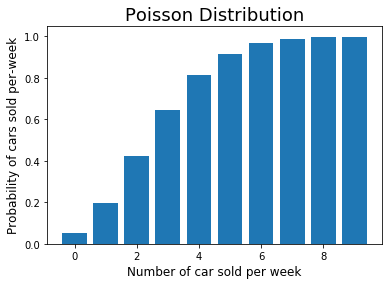

In [11]:
cuml = stats.poisson.cdf(n,rate) 
plt.bar(n,cuml)
plt.title('Poisson Distribution',size = 18)
plt.xlabel('Number of car sold per week',size = 12)
plt.ylabel('Probability of cars sold per-week',size = 12);

Accuracy in understanding orders for a speech based bot at a restaurant is important for the Company X which has designed,
marketed and launched the product for a contactless delivery due to the COVID-19 pandemic. Recognition accuracy that measures the
percentage of orders that are taken correctly is 86.8%. Suppose that you place an order with the bot and two friends of yours
independently place orders with the same bot. Answer the following questions.

In [12]:
n =3 
p=0.868
k=np.arange(0,11)
binom=stats.binom.pmf(k,n,p)

What is the probability that all three orders will be recognised correctly?

In [13]:
stats.binom.pmf(3, n, p)

0.653972032

What is the probability that none of the three orders will be recognised correctly?

In [14]:
binom[0]

0.0022999680000000003

What is the probability that at least two of the three orders will be recognised correctly?

In [15]:
1-stats.binom.cdf(1,n,p)

0.952327936

Applied statistics is a very important tool to predict the future and reduce the uncertainty. 
Consider an automoble parts manufacturing factory. Cpk (Process Capability Indice) use to measure the quality of the process. In Cpk measurement it takes a sample of more than 30 manufactured part and inspect every quality parameter. with the data collected during inspection will be analysed and estimate the population quality. Cpk helps to take decisions such as improvement in process, probability of rejection, so on.
T distribution, estimation technics are used in Cpk. 
Apart from Cpk manufacturing industry used other statistics and probability functions in planning, scheduling, and other various decision making. 

Company X manages the men's top professional basketball division of the American league system. The dataset contains information
on all the teams that have participated in all the past tournaments. It has data about how many baskets each team scored, conceded, how many
times they came within the first 2 positions, how many tournaments they have qualified, their best position in the past, etc.

In [16]:
basketball = pd.read_csv('C:/Visruth TM/Personal data/Great Learning/AIML/Applied Statitics/Project/DS+-+Part2+-+Basketball.csv')

In [17]:
basketball.head()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931to32,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1


In [18]:
basketball.tail()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
56,Team 57,1,34,38,8,10,20,38,66,-,-,2009-10,20
57,Team 58,1,22,30,7,8,15,37,57,-,-,1956-57,16
58,Team 59,1,19,30,7,5,18,51,85,-,-,1951~52,16
59,Team 60,1,14,30,5,4,21,34,65,-,-,1955-56,15
60,Team 61,1,-,-,-,-,-,-,-,-,-,2017~18,9


In [19]:
basketball.shape

(61, 13)

In [20]:
basketball.replace(to_replace='-', value=0, inplace=True)

In [21]:
basketball['TeamLaunch'] = basketball['TeamLaunch'].apply(lambda year: str(year)[:4])

In [22]:
columns = basketball.columns
basketball[columns[1:]] = basketball[columns[1:]].astype('int64')

In [23]:
basketball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Team                 61 non-null     object
 1   Tournament           61 non-null     int64 
 2   Score                61 non-null     int64 
 3   PlayedGames          61 non-null     int64 
 4   WonGames             61 non-null     int64 
 5   DrawnGames           61 non-null     int64 
 6   LostGames            61 non-null     int64 
 7   BasketScored         61 non-null     int64 
 8   BasketGiven          61 non-null     int64 
 9   TournamentChampion   61 non-null     int64 
 10  Runner-up            61 non-null     int64 
 11  TeamLaunch           61 non-null     int64 
 12  HighestPositionHeld  61 non-null     int64 
dtypes: int64(12), object(1)
memory usage: 6.3+ KB


In [24]:
basketball.describe().T

,count,mean,std,min,25%,50%,75%,max
Tournament,61.0,24.000000,26.827225,1.0,4.0,12.0,38.0,86.0
Score,61.0,901.426230,1134.899121,0.0,96.0,375.0,1351.0,4385.0
PlayedGames,61.0,796.819672,876.282765,0.0,114.0,423.0,1318.0,2762.0
WonGames,61.0,303.967213,406.991030,0.0,34.0,123.0,426.0,1647.0
DrawnGames,61.0,188.934426,201.799477,0.0,24.0,95.0,330.0,633.0
LostGames,61.0,303.754098,294.708594,0.0,62.0,197.0,563.0,1070.0
BasketScored,61.0,1140.344262,1506.740211,0.0,153.0,430.0,1642.0,5947.0
BasketGiven,61.0,1140.229508,1163.710766,0.0,221.0,632.0,1951.0,3889.0
TournamentChampion,61.0,1.426230,5.472535,0.0,0.0,0.0,0.0,33.0
Runner-up,61.0,1.409836,4.540107,0.0,0.0,0.0,0.0,25.0


In [25]:
noresult = basketball['PlayedGames'] - (basketball['DrawnGames'] + basketball['WonGames'] + basketball['LostGames'])
basketball.insert(loc=7, column='No Result', value=noresult)

In [26]:
winper = basketball['WonGames']/(basketball['PlayedGames']-basketball['No Result'])
basketball.insert(loc=5,column='WonPercentage', value = winper)

In [27]:
lostper= basketball['LostGames']/(basketball['PlayedGames']-basketball['No Result'])
basketball.insert(loc=8,column="LostPercentage", value = lostper) 

In [28]:
winrat= basketball['WonGames']/ basketball['LostGames']
basketball.insert(loc=10,column="WonRatio", value = winrat)    

In [29]:
bskratio= basketball['BasketScored']/ basketball['BasketGiven']
basketball.insert(loc=13,column="BasketRatio", value = bskratio) 

In [30]:
chpper= basketball['TournamentChampion']/ (basketball['PlayedGames']-basketball['No Result'])
basketball.insert(loc=15,column="ChampionPercentage", value = chpper)  

In [31]:
basketball.replace(to_replace='-', value=0, inplace=True)

In [32]:
basketball.head()

,Team,Tournament,Score,PlayedGames,WonGames,WonPercentage,DrawnGames,LostGames,LostPercentage,No Result,WonRatio,BasketScored,BasketGiven,BasketRatio,TournamentChampion,ChampionPercentage,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,0.596307,552,563,0.203838,0,2.925400,5947,3140,1.893949,33,0.011948,23,1929,1
1,Team 2,86,4262,2762,1581,0.572411,573,608,0.220130,0,2.600329,5900,3114,1.894669,25,0.009051,25,1929,1
2,Team 3,80,3442,2614,1241,0.474751,598,775,0.296480,0,1.601290,4534,3309,1.370202,10,0.003826,8,1929,1
3,Team 4,82,3386,2664,1187,0.445571,616,861,0.323198,0,1.378630,4398,3469,1.267801,6,0.002252,6,1931,1
4,Team 5,86,3368,2762,1209,0.437726,633,920,0.333092,0,1.314130,4631,3700,1.251622,8,0.002896,7,1929,1


In [33]:
basketball.tail()

,Team,Tournament,Score,PlayedGames,WonGames,WonPercentage,DrawnGames,LostGames,LostPercentage,No Result,WonRatio,BasketScored,BasketGiven,BasketRatio,TournamentChampion,ChampionPercentage,Runner-up,TeamLaunch,HighestPositionHeld
56,Team 57,1,34,38,8,0.210526,10,20,0.526316,0,0.400000,38,66,0.575758,0,0.0,0,2009,20
57,Team 58,1,22,30,7,0.233333,8,15,0.500000,0,0.466667,37,57,0.649123,0,0.0,0,1956,16
58,Team 59,1,19,30,7,0.233333,5,18,0.600000,0,0.388889,51,85,0.600000,0,0.0,0,1951,16
59,Team 60,1,14,30,5,0.166667,4,21,0.700000,0,0.238095,34,65,0.523077,0,0.0,0,1955,15
60,Team 61,1,0,0,0,NaN,0,0,NaN,0,NaN,0,0,NaN,0,NaN,0,2017,9


In [34]:
basketball.describe().T

,count,mean,std,min,25%,50%,75%,max
Tournament,61.0,24.000000,26.827225,1.000000,4.000000,12.000000,38.000000,86.000000
Score,61.0,901.426230,1134.899121,0.000000,96.000000,375.000000,1351.000000,4385.000000
PlayedGames,61.0,796.819672,876.282765,0.000000,114.000000,423.000000,1318.000000,2762.000000
WonGames,61.0,303.967213,406.991030,0.000000,34.000000,123.000000,426.000000,1647.000000
WonPercentage,60.0,0.313723,0.078291,0.166667,0.276075,0.304917,0.335402,0.596307
DrawnGames,61.0,188.934426,201.799477,0.000000,24.000000,95.000000,330.000000,633.000000
LostGames,61.0,303.754098,294.708594,0.000000,62.000000,197.000000,563.000000,1070.000000
LostPercentage,60.0,0.450041,0.084040,0.203838,0.411430,0.457271,0.485424,0.700000
No Result,61.0,0.163934,1.280369,0.000000,0.000000,0.000000,0.000000,10.000000
WonRatio,60.0,0.767615,0.450521,0.238095,0.561616,0.641341,0.814233,2.925400


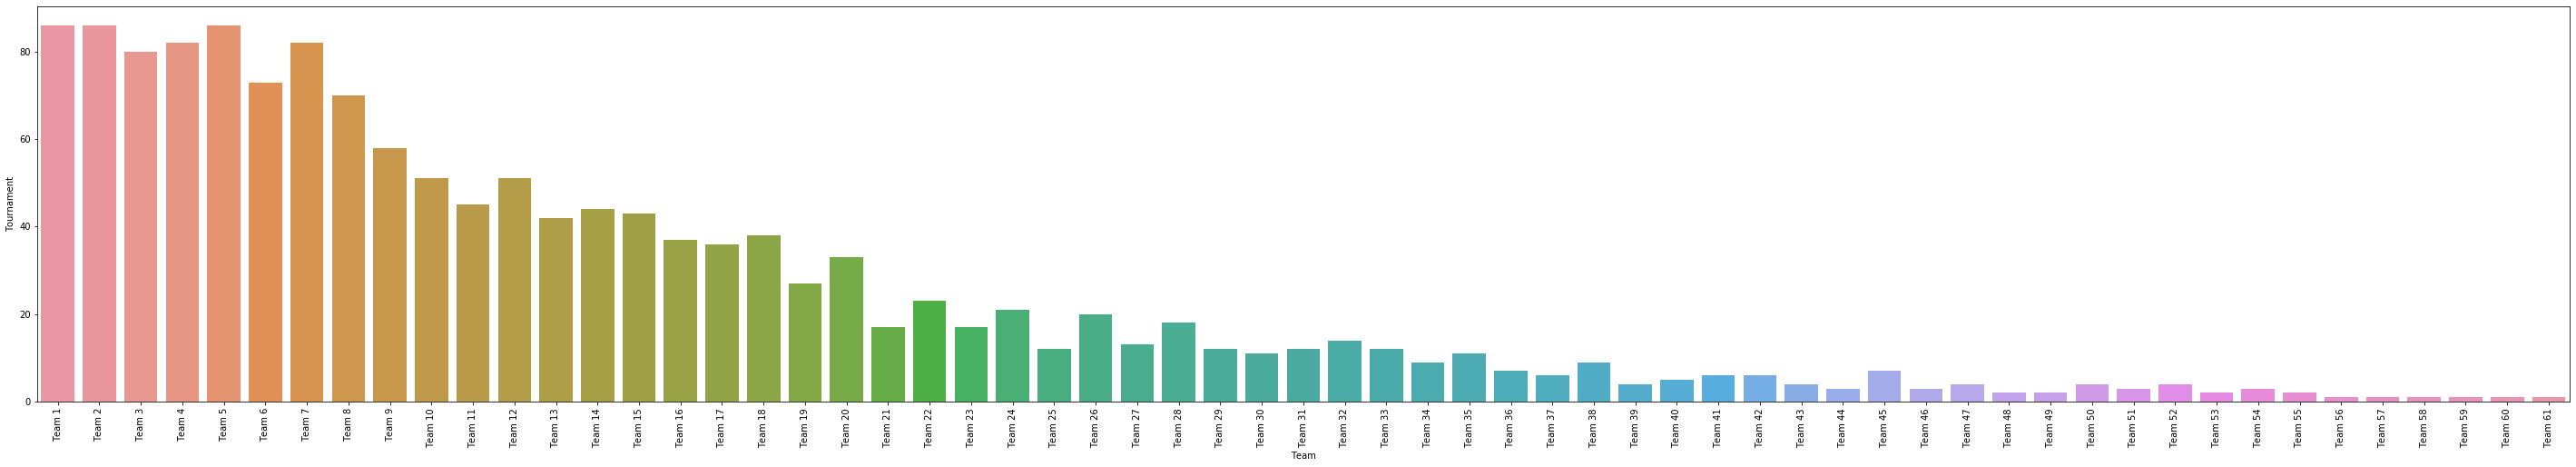

In [35]:
plt.figure(figsize=(50,8))
plt.xticks(rotation=90)
sns.barplot(x=basketball['Team'],y= basketball['Tournament']);

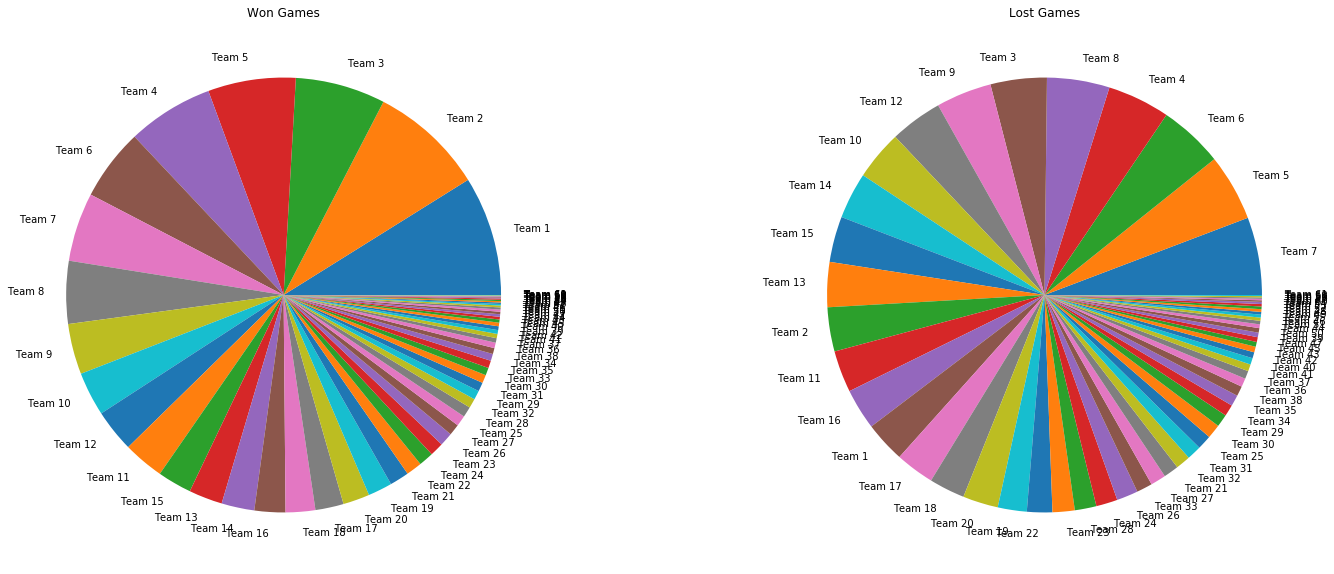

In [36]:
plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
wonsort=basketball[['Team','WonGames']].sort_values(by="WonGames", ascending=False)
lostsort=basketball[['Team','LostGames']].sort_values(by="LostGames", ascending=False)
plt.pie(wonsort['WonGames'], labels=list(wonsort['Team']));
plt.title('Won Games')
plt.subplot(1,2,2)
plt.pie(lostsort['LostGames'], labels=list(lostsort['Team']));
plt.title('Lost Games');

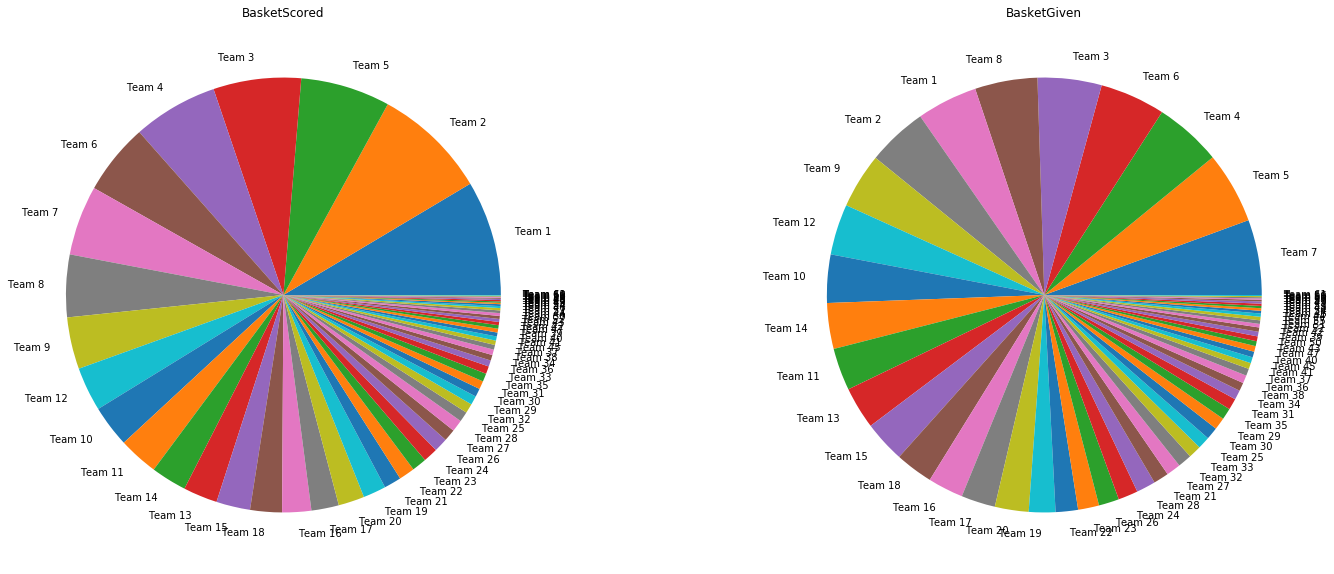

In [37]:
plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
bskscor=basketball[['Team','BasketScored']].sort_values(by="BasketScored", ascending=False)
bskgiv=basketball[['Team','BasketGiven']].sort_values(by="BasketGiven", ascending=False)
plt.pie(bskscor['BasketScored'], labels=list(bskscor['Team']));
plt.title('BasketScored')
plt.subplot(1,2,2)
plt.pie(bskgiv['BasketGiven'], labels=list(bskgiv['Team']));
plt.title('BasketGiven');

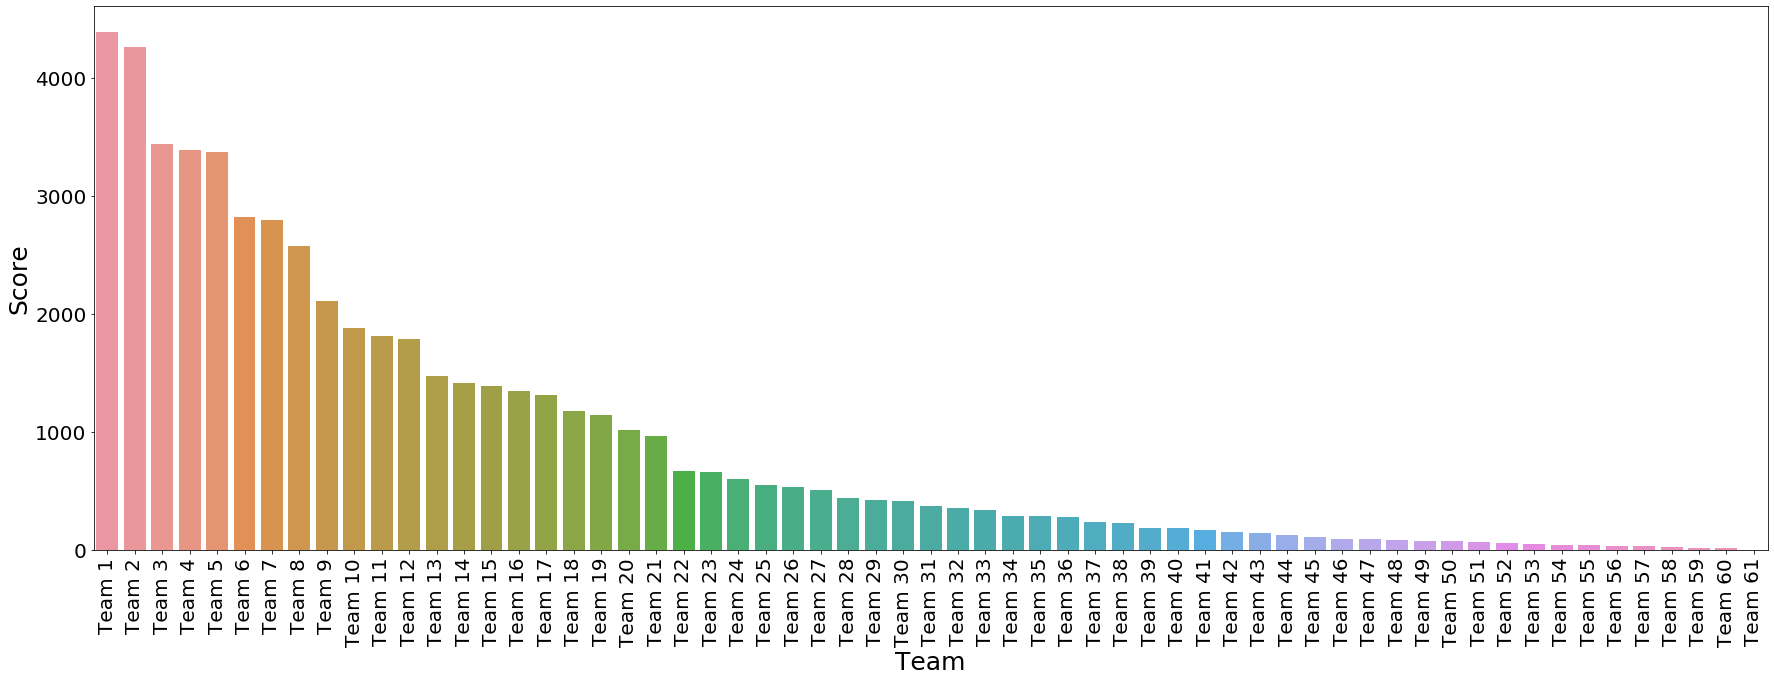

In [38]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=90,size=20)
plt.yticks(size=20)
plt.xlabel('Team',size=25)
plt.ylabel('Score',size=25)
sns.barplot(data=basketball,x='Team', y='Score',orient = 'v');

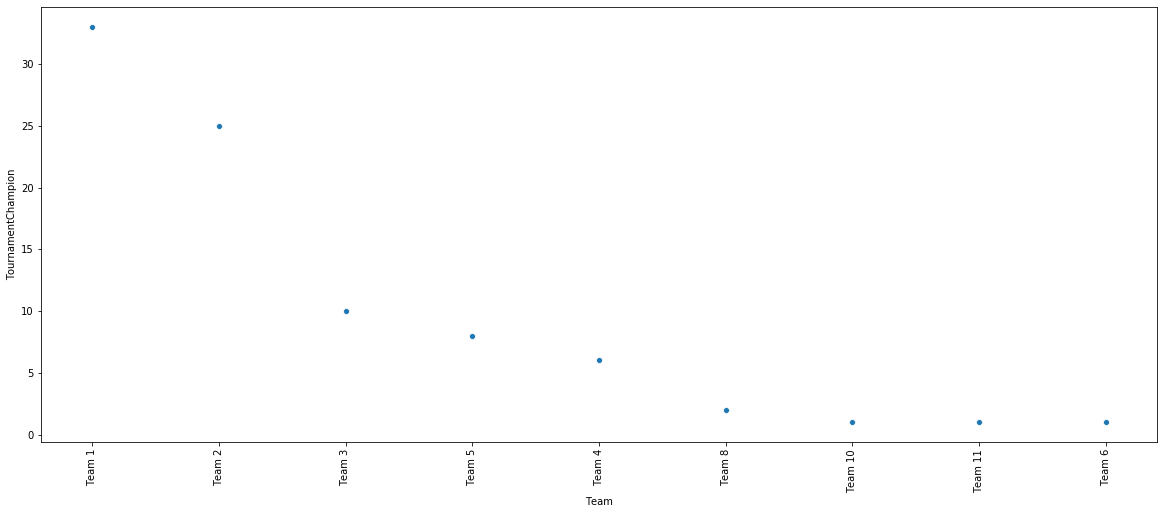

In [39]:
plt.figure(figsize=(20,8))
chp= basketball[['Team','TournamentChampion']].sort_values(by="TournamentChampion", ascending=False).where(lambda x: x["TournamentChampion"] > 0);
sns.scatterplot(x=chp['Team'],y=chp['TournamentChampion']);
plt.xticks(rotation=90);

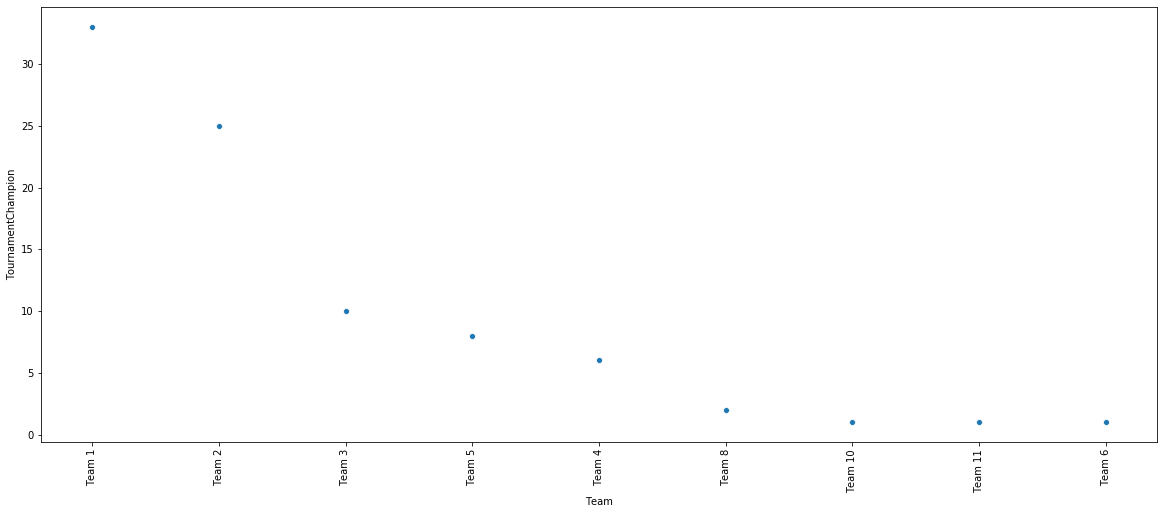

In [40]:
plt.figure(figsize=(20,8))
chp= basketball[['Team','TournamentChampion']].sort_values(by="TournamentChampion", ascending=False).where(lambda x: x["TournamentChampion"] > 0);
sns.scatterplot(x=chp['Team'],y=chp['TournamentChampion'],);
plt.xticks(rotation=90);

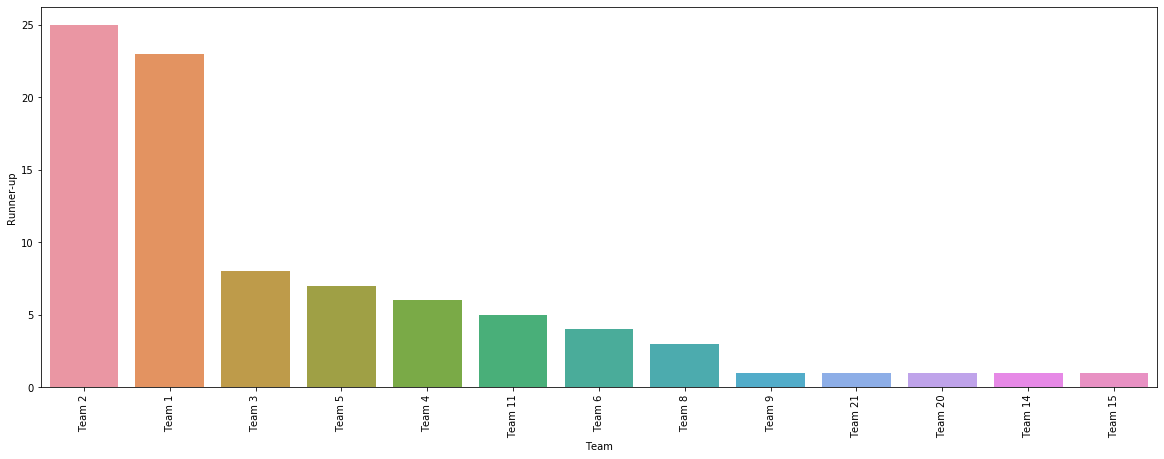

In [41]:
plt.figure(figsize=(20,7))
rnup= basketball[['Team','Runner-up']].sort_values(by="Runner-up", ascending=False).where(lambda x: x["Runner-up"] > 0);
sns.barplot(x=rnup['Team'],y=rnup['Runner-up']);
plt.xticks(rotation=90);

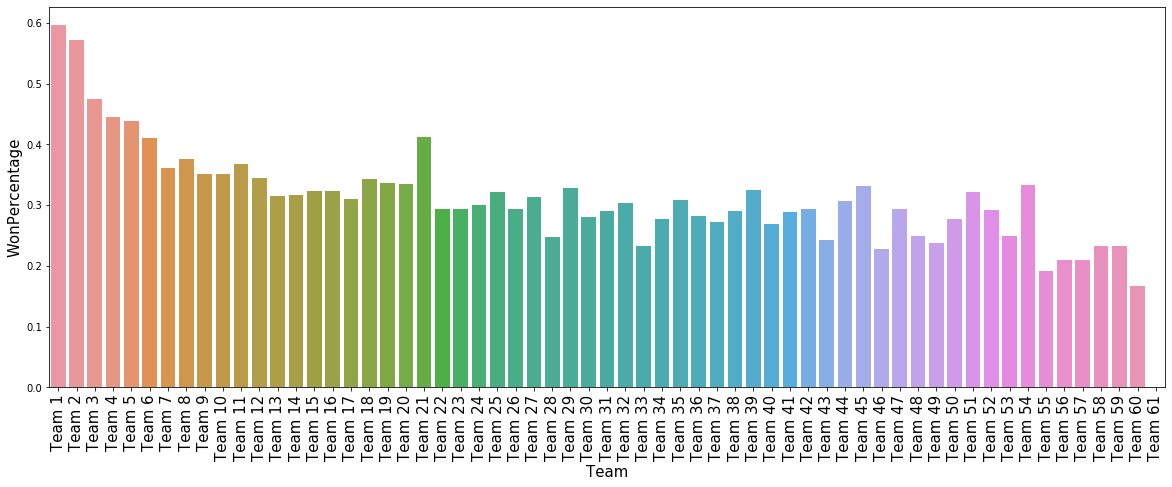

In [42]:
plt.figure(figsize=(20,7))
plt.xlabel('Team',size=15)
plt.ylabel('WonPercentage',size=15)
sns.barplot(x=basketball['Team'],y=basketball['WonPercentage']);
plt.xticks(rotation=90,size=15);

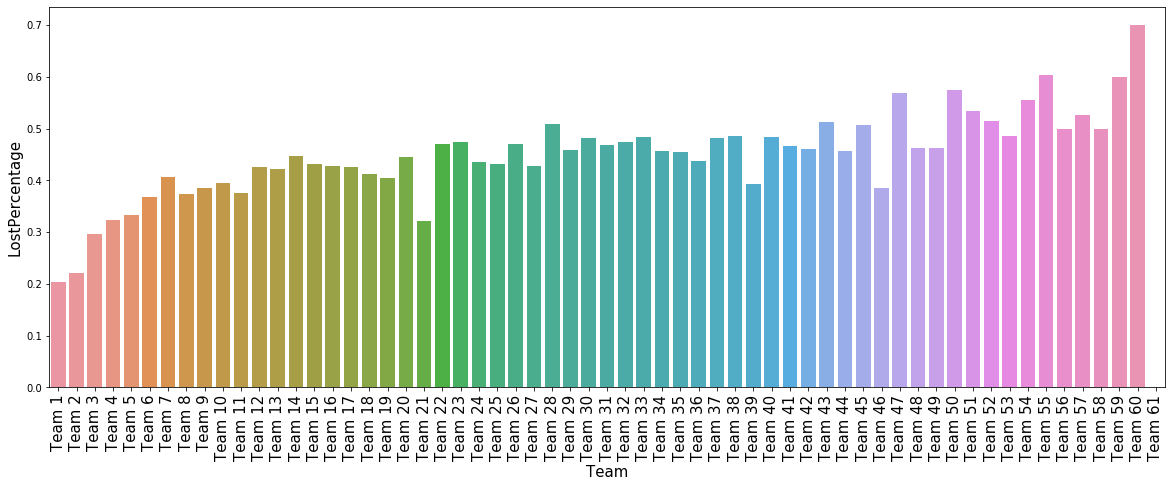

In [43]:
plt.figure(figsize=(20,7))
plt.xlabel('Team',size=15)
plt.ylabel('LostPercentage',size=15)
sns.barplot(x=basketball['Team'],y=basketball['LostPercentage']);
plt.xticks(rotation=90,size=15);

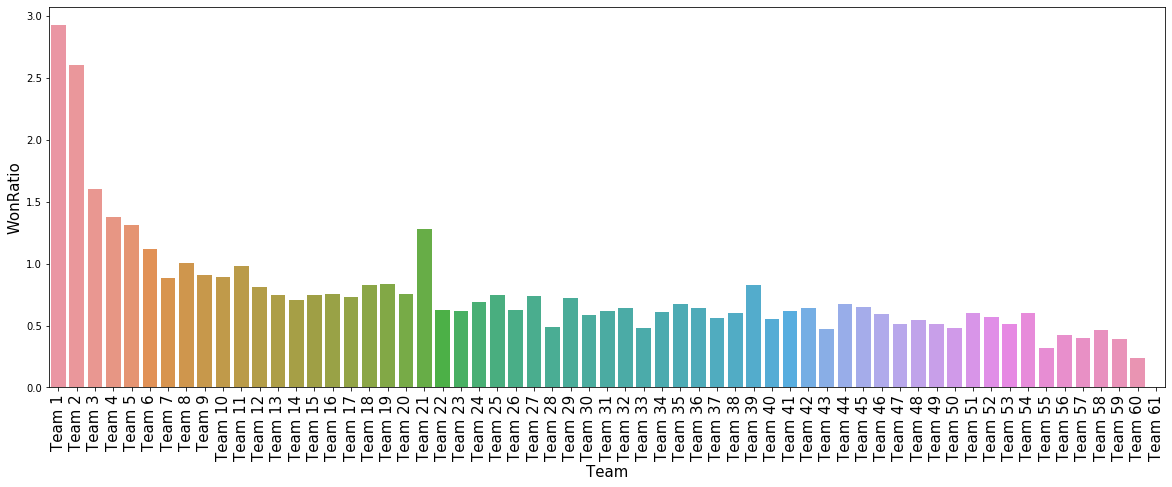

In [44]:
plt.figure(figsize=(20,7))
plt.xlabel('Team',size=15)
plt.ylabel('WonRatio',size=15)
sns.barplot(x=basketball['Team'],y=basketball['WonRatio']);
plt.xticks(rotation=90,size=15);

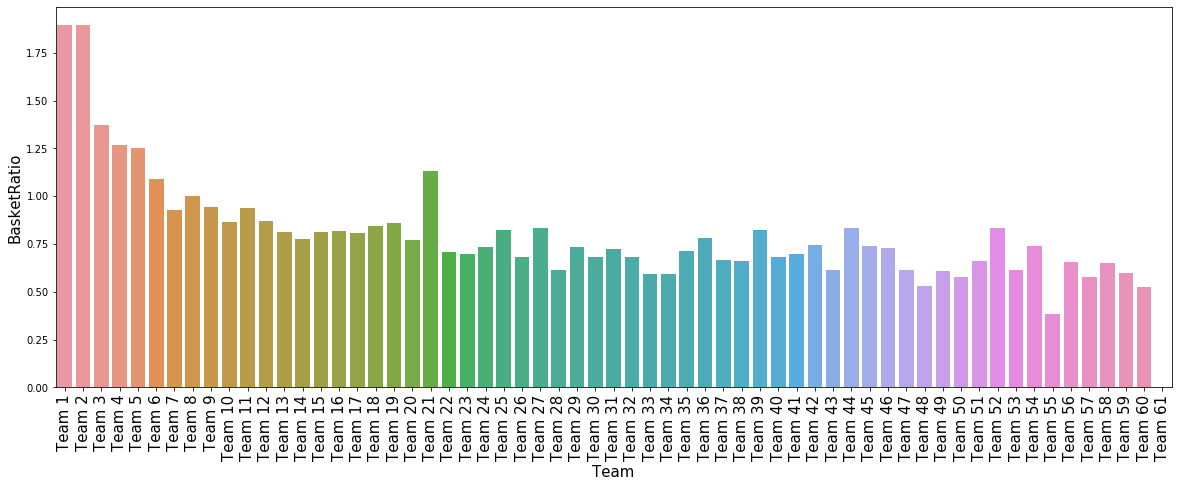

In [45]:
plt.figure(figsize=(20,7))
plt.xlabel('Team',size=15)
plt.ylabel('basketRatio',size=15)
sns.barplot(x=basketball['Team'],y=basketball['BasketRatio']);
plt.xticks(rotation=90,size=15);

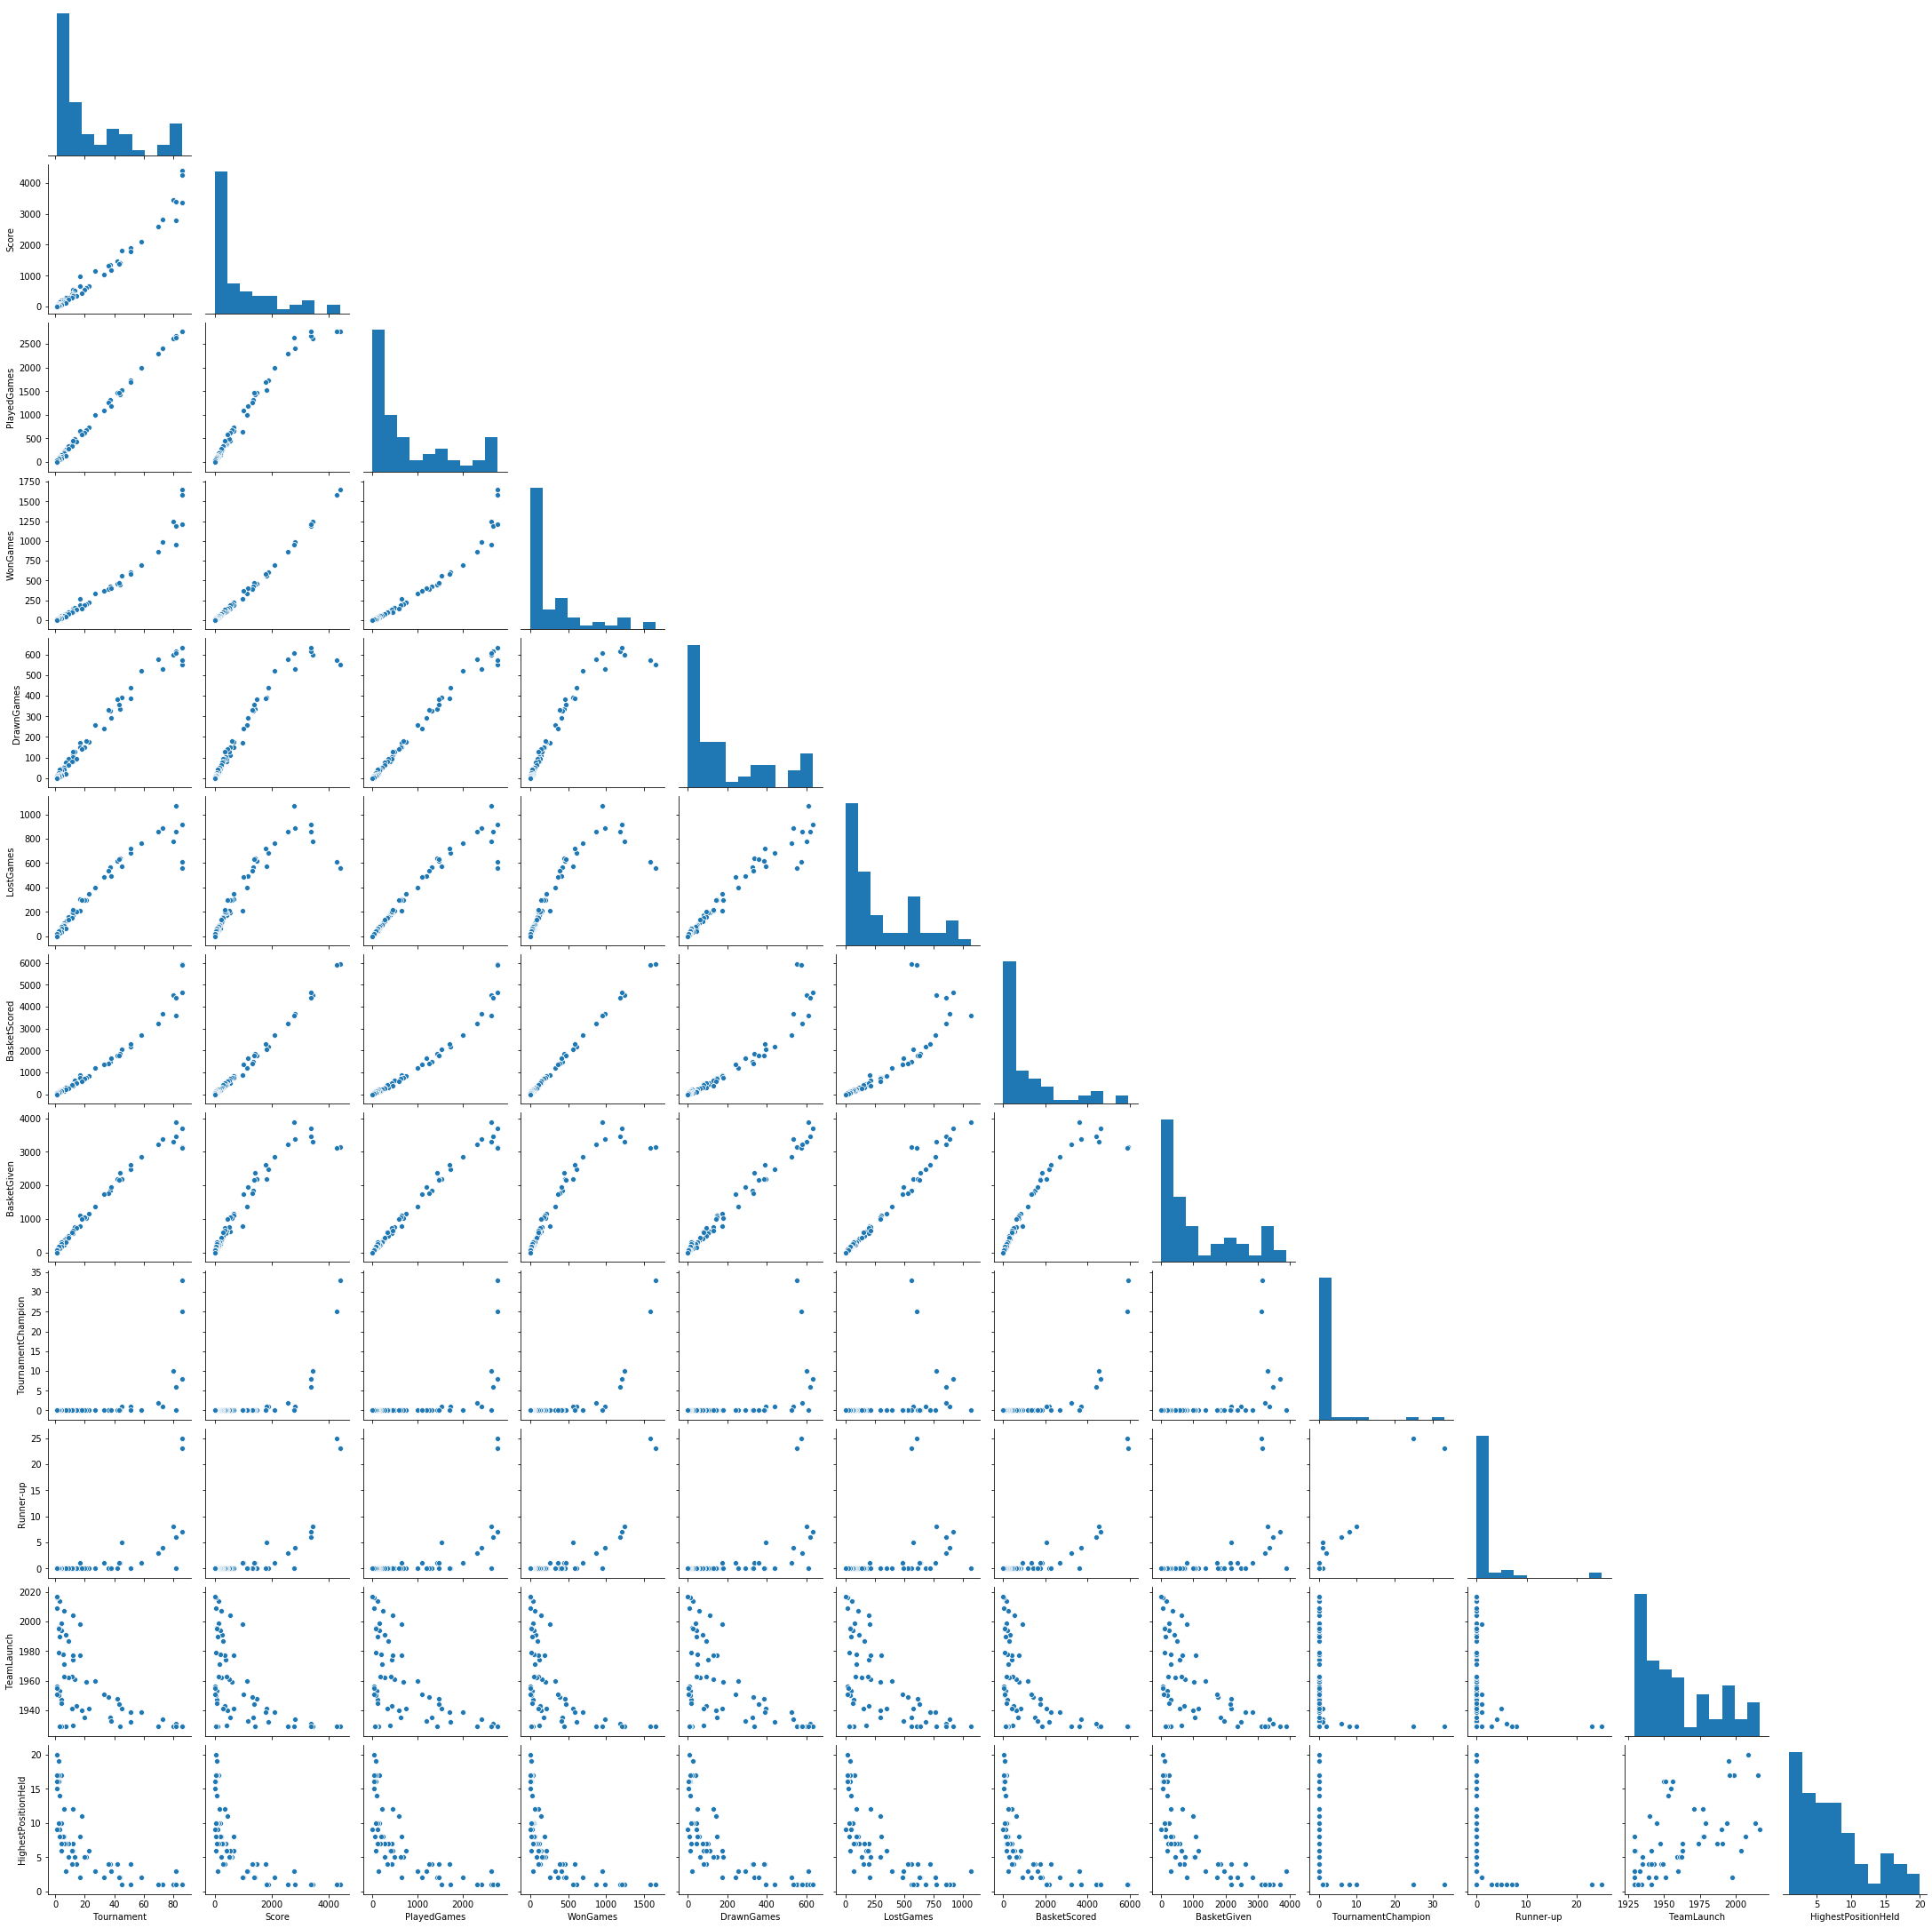

In [46]:
sns.pairplot(data=basketball, vars=['Tournament','Score','PlayedGames','WonGames','DrawnGames','LostGames','BasketScored','BasketGiven','TournamentChampion','Runner-up','TeamLaunch','HighestPositionHeld'], corner=True);

In [47]:
basketball[basketball['Tournament'] == max(basketball['Tournament'])].head(1)

,Team,Tournament,Score,PlayedGames,WonGames,WonPercentage,DrawnGames,LostGames,LostPercentage,No Result,WonRatio,BasketScored,BasketGiven,BasketRatio,TournamentChampion,ChampionPercentage,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,0.596307,552,563,0.203838,0,2.9254,5947,3140,1.893949,33,0.011948,23,1929,1


In [48]:
basketball[basketball['WonGames'] == max(basketball['WonGames'])].head(1)

,Team,Tournament,Score,PlayedGames,WonGames,WonPercentage,DrawnGames,LostGames,LostPercentage,No Result,WonRatio,BasketScored,BasketGiven,BasketRatio,TournamentChampion,ChampionPercentage,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,0.596307,552,563,0.203838,0,2.9254,5947,3140,1.893949,33,0.011948,23,1929,1


In [49]:
basketball[basketball['LostGames'] == max(basketball['LostGames'])].head(1)

,Team,Tournament,Score,PlayedGames,WonGames,WonPercentage,DrawnGames,LostGames,LostPercentage,No Result,WonRatio,BasketScored,BasketGiven,BasketRatio,TournamentChampion,ChampionPercentage,Runner-up,TeamLaunch,HighestPositionHeld
6,Team 7,82,2792,2626,948,0.361005,608,1070,0.407464,0,0.885981,3609,3889,0.928002,0,0.0,0,1929,3


In [50]:
basketball[basketball['WonPercentage'] == max(basketball['WonPercentage'])].head(1)

,Team,Tournament,Score,PlayedGames,WonGames,WonPercentage,DrawnGames,LostGames,LostPercentage,No Result,WonRatio,BasketScored,BasketGiven,BasketRatio,TournamentChampion,ChampionPercentage,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,0.596307,552,563,0.203838,0,2.9254,5947,3140,1.893949,33,0.011948,23,1929,1


In [51]:
basketball[basketball['WonRatio'] == max(basketball['WonRatio'])].head(1)

,Team,Tournament,Score,PlayedGames,WonGames,WonPercentage,DrawnGames,LostGames,LostPercentage,No Result,WonRatio,BasketScored,BasketGiven,BasketRatio,TournamentChampion,ChampionPercentage,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,0.596307,552,563,0.203838,0,2.9254,5947,3140,1.893949,33,0.011948,23,1929,1


The Oldest Team

In [52]:
basketball[basketball['TeamLaunch'] == min(basketball['TeamLaunch'])].head(5)

,Team,Tournament,Score,PlayedGames,WonGames,WonPercentage,DrawnGames,LostGames,LostPercentage,No Result,WonRatio,BasketScored,BasketGiven,BasketRatio,TournamentChampion,ChampionPercentage,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,0.596307,552,563,0.203838,0,2.925400,5947,3140,1.893949,33,0.011948,23,1929,1
1,Team 2,86,4262,2762,1581,0.572411,573,608,0.220130,0,2.600329,5900,3114,1.894669,25,0.009051,25,1929,1
2,Team 3,80,3442,2614,1241,0.474751,598,775,0.296480,0,1.601290,4534,3309,1.370202,10,0.003826,8,1929,1
4,Team 5,86,3368,2762,1209,0.437726,633,920,0.333092,0,1.314130,4631,3700,1.251622,8,0.002896,7,1929,1
6,Team 7,82,2792,2626,948,0.361005,608,1070,0.407464,0,0.885981,3609,3889,0.928002,0,0.000000,0,1929,3


In [53]:
basketball[basketball['TournamentChampion'] == max(basketball['TournamentChampion'])].head(1)

,Team,Tournament,Score,PlayedGames,WonGames,WonPercentage,DrawnGames,LostGames,LostPercentage,No Result,WonRatio,BasketScored,BasketGiven,BasketRatio,TournamentChampion,ChampionPercentage,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,0.596307,552,563,0.203838,0,2.9254,5947,3140,1.893949,33,0.011948,23,1929,1


In [54]:
basketball[basketball['BasketRatio'] == max(basketball['BasketRatio'])].head(1)

,Team,Tournament,Score,PlayedGames,WonGames,WonPercentage,DrawnGames,LostGames,LostPercentage,No Result,WonRatio,BasketScored,BasketGiven,BasketRatio,TournamentChampion,ChampionPercentage,Runner-up,TeamLaunch,HighestPositionHeld
1,Team 2,86,4262,2762,1581,0.572411,573,608,0.22013,0,2.600329,5900,3114,1.894669,25,0.009051,25,1929,1


Team 1 is the best among the teams. 

Company X is a EU online publisher focusing on the startups industry. The company specifically reports on the business related to
technology news, analysis of emerging trends and profiling of new tech businesses and products. Their event i.e. Startup Battlefield is the world’s
pre-eminent startup competition. Startup Battlefield features 15-30 top early stage startups pitching top judges in front of a vast live audience,
present in person and online.

In [55]:
company = pd.read_csv('C:/Visruth TM/Personal data/Great Learning/AIML/Applied Statitics/Project/DS+-+Part3+-+CompanyX_EU.csv')

In [56]:
company.head()

,Startup,Product,Funding,Event,Result,OperatingState
0,2600Hz,2600hz.com,NaN,Disrupt SF 2013,Contestant,Operating
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed
2,3DPrinterOS,3dprinteros.com,NaN,Disrupt SF 2016,Contestant,Operating
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating
4,42 Technologies,42technologies.com,NaN,Disrupt NYC 2013,Contestant,Operating


In [57]:
company.tail()

,Startup,Product,Funding,Event,Result,OperatingState
657,Zivity,zivity.com,$8M,TC40 2007,Contestant,Operating
658,Zmorph,zmorph3d.com,$1M,-,Audience choice,Operating
659,Zocdoc,zocdoc.com,$223M,TC40 2007,Contestant,Operating
660,Zula,zulaapp.com,$3.4M,Disrupt SF 2013,Audience choice,Operating
661,Zumper,zumper.com,$31.5M,Disrupt SF 2012,Finalist,Operating


In [58]:
company.shape

(662, 6)

In [59]:
company.info

<bound method DataFrame.info of              Startup             Product Funding             Event  \
0             2600Hz          2600hz.com     NaN   Disrupt SF 2013   
1               3DLT            3dlt.com   $630K  Disrupt NYC 2013   
2        3DPrinterOS     3dprinteros.com     NaN   Disrupt SF 2016   
3         3Dprintler      3dprintler.com     $1M   Disrupt NY 2016   
4    42 Technologies  42technologies.com     NaN  Disrupt NYC 2013   
..               ...                 ...     ...               ...   
657           Zivity          zivity.com     $8M         TC40 2007   
658           Zmorph        zmorph3d.com     $1M                 -   
659           Zocdoc          zocdoc.com   $223M         TC40 2007   
660             Zula         zulaapp.com   $3.4M   Disrupt SF 2013   
661           Zumper          zumper.com  $31.5M   Disrupt SF 2012   

              Result OperatingState  
0         Contestant      Operating  
1         Contestant         Closed  
2         Con

In [60]:
company.describe().T

,count,unique,top,freq
Startup,662,662,Ritual,1
Product,656,656,burtcorp.com,1
Funding,448,240,$1M,17
Event,662,26,TC50 2008,52
Result,662,5,Contestant,488
OperatingState,662,4,Operating,465


In [61]:
company.dtypes

Startup           object
Product           object
Funding           object
Event             object
Result            object
OperatingState    object
dtype: object

In [62]:
company.dropna(inplace=True)
company.isnull().sum()

Startup           0
Product           0
Funding           0
Event             0
Result            0
OperatingState    0
dtype: int64

In [63]:
company.Funding

1       $630K
3         $1M
5      $19.3M
6        $29M
10      $1.8M
        ...  
657       $8M
658       $1M
659     $223M
660     $3.4M
661    $31.5M
Name: Funding, Length: 446, dtype: object

In [64]:
company.loc[:,'Funds_in_million'] =company['Funding'].apply(lambda x: x if x==0 else (float(x[1:-1])/1000 if x[-1] == 'K' else (float(x[1:-1])*1000 if x[-1] == 'B' else float(x[1:-1]))))

In [65]:
company.describe().T

,count,mean,std,min,25%,50%,75%,max
Funds_in_million,446.0,17.241489,90.48371,0.005,0.74525,2.2,9.475,1700.0


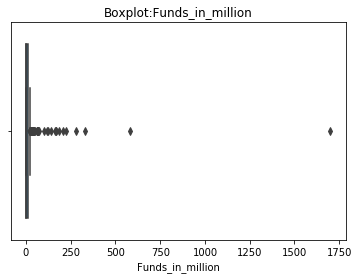

In [66]:
plt.title('Boxplot:Funds_in_million')
plt.xlabel('Funds_in_million')
sns.boxplot(data=company, x='Funds_in_million');

In [67]:
Q3 = np.percentile(company['Funds_in_million'], 75, interpolation = 'midpoint')
Q1 = np.percentile(company['Funds_in_million'], 25, interpolation = 'midpoint')
iqr=Q3-Q1
iqr

8.7045

In [68]:
count = company[company['Funds_in_million'] > (Q3 + 1.5 * iqr)].count()
count

Startup             60
Product             60
Funding             60
Event               60
Result              60
OperatingState      60
Funds_in_million    60
dtype: int64

In [69]:
company[company['Funds_in_million'] > Q3 + 1.5 * iqr].head(98)

,Startup,Product,Funding,Event,Result,OperatingState,Funds_in_million
6,8 Securities,8securities.com,$29M,Disrupt Beijing 2011,Finalist,Operating,29.0
31,Anyclip,anyclip.com,$24M,TC50 2009,Finalist,Operating,24.0
40,Artsy,artsy.net,$50.9M,Disrupt NYC 2010,Contestant,Operating,50.9
49,Badgeville,badgeville.com,$40M,Disrupt SF 2010,Finalist,Acquired,40.0
56,Betterment,betterment.com,$205M,Disrupt NYC 2010,Finalist,Operating,205.0
108,Clickable,clickable.com,$32.5M,TC40 2007,Finalist,Acquired,32.5
113,Cloudflare,cloudflare.com,$182.1M,Disrupt SF 2010,Runner up,Operating,182.1
128,Credit Sesame,creditsesame.com,$35.4M,Disrupt SF 2010,Contestant,Operating,35.4
130,CrowdFlower Inc.,crowdflower.com,$38M,TC50 2009,Contestant,Operating,38.0
132,Cubic Telecom,cubictelecom.com,$37.1M,TC40 2007,Contestant,Operating,37.1


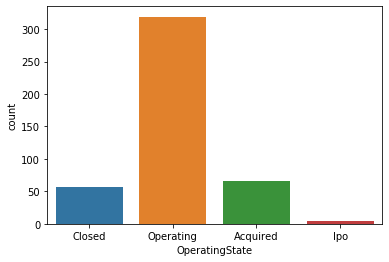

In [70]:
sns.countplot(x=company['OperatingState']);

In [71]:
# C. Test for significance and conclusion
operating_funds = company[company['OperatingState'] == 'Operating']['Funds_in_million']
closed_funds = company[company['OperatingState'] == 'Closed']['Funds_in_million']
t_statistic, p_value = ttest_ind(operating_funds, closed_funds)
print(f'T-statistic: {t_statistic}, P-value: {p_value}')
if p_value < 0.05:
    print('Reject the null hypothesis. There is a significant difference in funds raised.')
else:
    print('Fail to reject the null hypothesis. There is no significant difference in funds raised.')

T-statistic: 1.1382924515740138, P-value: 0.25572701885629406
Fail to reject the null hypothesis. There is no significant difference in funds raised.


In [72]:
#copy of the original data frame
company2=company.copy()
company2

,Startup,Product,Funding,Event,Result,OperatingState,Funds_in_million
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed,0.63
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating,1.00
5,5to1,5to1.com,$19.3M,TC50 2009,Contestant,Acquired,19.30
6,8 Securities,8securities.com,$29M,Disrupt Beijing 2011,Finalist,Operating,29.00
10,AdhereTech,adheretech.com,$1.8M,Hardware Battlefield 2014,Contestant,Operating,1.80
...,...,...,...,...,...,...,...
657,Zivity,zivity.com,$8M,TC40 2007,Contestant,Operating,8.00
658,Zmorph,zmorph3d.com,$1M,-,Audience choice,Operating,1.00
659,Zocdoc,zocdoc.com,$223M,TC40 2007,Contestant,Operating,223.00
660,Zula,zulaapp.com,$3.4M,Disrupt SF 2013,Audience choice,Operating,3.40


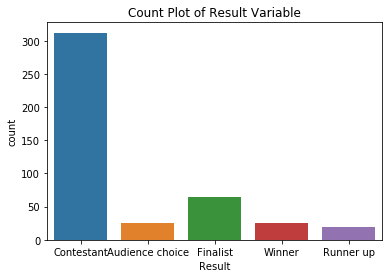

In [73]:
#Check frequency distribution of Result variables.
sns.countplot(x='Result', data=company)
plt.title('Count Plot of Result Variable')
plt.show()

In [74]:
win=company[company['Result'] == 'Winner'].count()
win

Startup             25
Product             25
Funding             25
Event               25
Result              25
OperatingState      25
Funds_in_million    25
dtype: int64

In [75]:
opr=company[company['OperatingState'] == 'Operating'].count()
opr

Startup             319
Product             319
Funding             319
Event               319
Result              319
OperatingState      319
Funds_in_million    319
dtype: int64

In [76]:
cont=company[company['Result'] == 'Contestant'].count()
cont

Startup             312
Product             312
Funding             312
Event               312
Result              312
OperatingState      312
Funds_in_million    312
dtype: int64

In [77]:
# Calculate percentage of winners and contestants that are still operating
winners_operating = company[(company['Result'] == 'Winner') & (company['OperatingState'] == 'Operating')].shape[0]
contestants_operating = company[(company['Result'] == 'Contestant') & (company['OperatingState'] == 'Operating')].shape[0]
total_winners = company[company['Result'] == 'Winner'].shape[0]
total_contestants = company[company['Result'] == 'Contestant'].shape[0]

percentage_winners_operating = (winners_operating / total_winners) * 100
percentage_contestants_operating = (contestants_operating / total_contestants) * 100

print(f'Percentage of winners still operating: {percentage_winners_operating:.2f}%')
print(f'Percentage of contestants still operating: {percentage_contestants_operating:.2f}%')


Percentage of winners still operating: 72.00%
Percentage of contestants still operating: 68.59%


In [78]:
# Create a contingency table
contingency_table = pd.crosstab(company['Result'], company['OperatingState'])

# Chi-square test for independence
chi2_stat, p_value, _, _ = stats.chi2_contingency(contingency_table)

print(f'Chi-square statistic: {chi2_stat}')
print(f'P-value: {p_value}')

# Set the significance level (alpha)
alpha = 0.05

# Compare p-value to alpha
if p_value < alpha:
    print('Reject the null hypothesis. There is a significant difference in the proportion of companies operating.')
else:
    print('Fail to reject the null hypothesis. There is no significant difference in the proportion of companies operating.')


Chi-square statistic: 23.19776873509632
P-value: 0.02609310570721727
Reject the null hypothesis. There is a significant difference in the proportion of companies operating.
